<a href="https://colab.research.google.com/github/somnath3112/Rocky_Road_DRL/blob/main/RockyRoad_env_and_RL_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic

In [ ]:
#@title Imports

import numpy as np
import random
%matplotlib inline

import matplotlib.pyplot as plt

# Rocky road

Number of states = 13, Number of action = 3


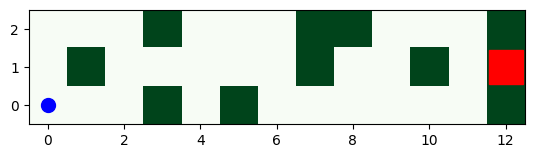

X-axis are states (each column) and there are three parallel actions leading to next state (the next column)

 
 Start game ...
Take acion =  [0]
At state =  [1]
Reward for the action =  0


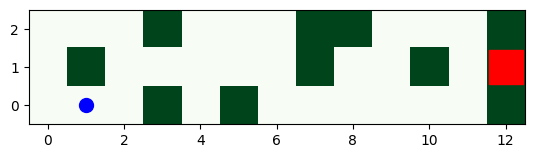

Take acion =  [1]
At state =  [2]
Reward for the action =  0


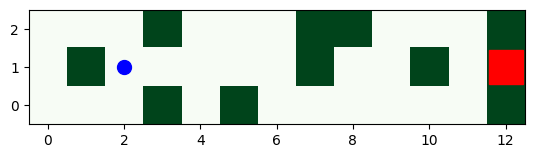

Take acion =  [2]
At state =  [3]
Reward for the action =  -5


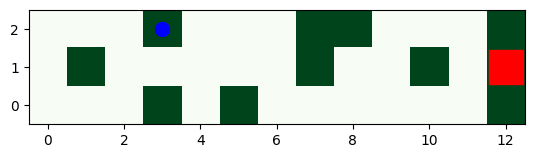


 
 Start ANOTHER game ...
Number of states = 13, Number of action = 3


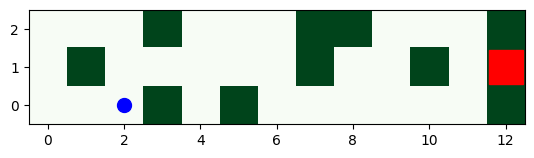

X-axis are states (each column) and there are three parallel actions leading to next state (the next column)
Take acion =  [0]
At state =  3
Reward for the action =  -5


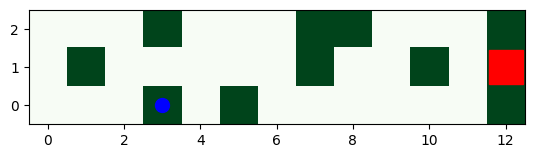

Take acion =  [1]
At state =  4
Reward for the action =  0


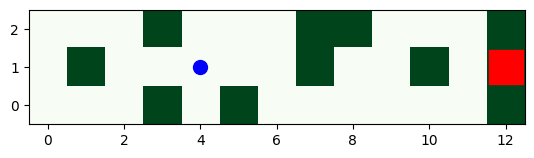

Take acion =  [2]
At state =  5
Reward for the action =  0


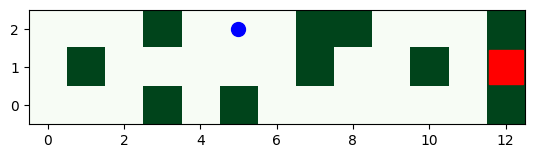


 
 All state near reward = [(0, 1, -5, 1), (2, 0, -5, 3), (2, 2, -5, 3), (4, 0, -5, 5), (6, 1, -5, 7), (6, 2, -5, 7), (7, 2, -5, 8), (9, 1, -5, 10), (11, 0, -5, 12), (11, 1, 10, 12), (11, 2, -5, 12)]

 
 All state at reward = [[1, 1], [3, 0], [3, 2], [5, 0], [7, 1], [7, 2], [8, 2], [10, 1], [12, 0], [12, 1], [12, 2]]

 Some episodes:

 At state = 1 & all actions, we get epsiode samples = [(0, 0, 0, 1), (0, 1, -5, 1), (0, 2, 0, 1)]

 At state = 3 & all actions, we get epsiode samples = [(2, 0, -5, 3), (2, 1, 0, 3), (2, 2, -5, 3)]

 At state = 3 & all actions, we get epsiode samples = [(2, 0, -5, 3), (2, 1, 0, 3), (2, 2, -5, 3)]

 At state = 5 & all actions, we get epsiode samples = [(4, 0, -5, 5), (4, 1, 0, 5), (4, 2, 0, 5)]

 At state = 7 & all actions, we get epsiode samples = [(6, 0, 0, 7), (6, 1, -5, 7), (6, 2, -5, 7)]

 At state = 7 & all actions, we get epsiode samples = [(6, 0, 0, 7), (6, 1, -5, 7), (6, 2, -5, 7)]

 At state = 8 & all actions, we get epsiode samples = [(7, 0, 0,

In [ ]:
#@title Env for rocky road

class rocky_road():
  def __init__(self,init_state=np.array([0])):
    self.state_shape = (1,)
    self.action_shape = (1,)
    if np.array(init_state).shape!=self.state_shape:
      print("\x1b[31mState shape must be {}!\x1b[0m".format(self.state_shape))
      return None
    self.init_state = np.array(init_state)
    self.reward_state = np.array([[0,0,0],[0,-5,0],[0,0,0],[-5,0,-5],[0,0,0],[-5,0,0],[0,0,0],[0,-5,-5],[0,0,-5],[0,0,0],[0,-5,0],[0,0,0],[-5,10,-5]])
    self.goal_state = np.array([12])
    self.nstates = self.reward_state.shape[0]
    self.nactions = self.reward_state.shape[1]
    self.sample_state_space = lambda nos=1: [ np.random.choice(np.arange(self.nstates),1) for i in range(nos) ]
    self.sample_action_space = lambda nos=1: [ np.random.choice(np.arange(self.nactions),1) for i in range(nos) ]
    self.set_state_action_near_reward()
    self.set_state_action_at_reward()
    self.reset()

  ## New idea
  def set_state_action_at_reward(self):
    self.reward_at_state_actions = [] #[[0,1],[2,0],[2,2],[4,0],[6,1],[6,2],[7,2],[9,1],[11,0],[11,1],[11,2]]
    for state,items in enumerate(self.reward_state):
      for action,vals in enumerate(items):
        if not(vals == 0):
          self.reward_at_state_actions.append([state,action])
    # print('All state near reward = {}'.format(self.reward_at_state_actions))
    return self.reward_at_state_actions

  def istep_ep(self,next_state,actions):
    sarns = []
    for action_val in actions:
      sarns.append((next_state-1,action_val,self.reward_state[next_state,action_val],next_state))
    return sarns

  ## Another version of the new idea
  def set_state_action_near_reward(self):
    self.reward_nbr_state_actions = [] #[[0,1],[2,0],[2,2],[4,0],[6,1],[6,2],[7,2],[9,1],[11,0],[11,1],[11,2]]
    for state,items in enumerate(self.reward_state):
      for action,vals in enumerate(items):
        if not(vals == 0):
          self.reward_nbr_state_actions.append((state-1,action,vals,state))
    # print('All state near reward = {}'.format(self.reward_nbr_state_actions))
    return self.reward_nbr_state_actions

  def reset_around_reward(self,n=3):
    new_init_state = self.reward_nbr_state_actions[np.random.choice(len(self.reward_nbr_state_actions),1)[0]][0]
    # print('All state near reward = {}'.format(self.reward_nbr_state_actions))
    # print('Randomly selected state near reward = {}'.format(new_init_state))
    self.state = new_init_state
    self.current_action = np.array([0])
    self.traj = []
    self.traj.append(self.state)
    return self.state

  def reset_uniform_randomly(self,n=3):
    new_init_state = np.random.choice(self.nstates,1)[0]
    self.state = new_init_state
    self.current_action = np.array([0])
    self.traj = []
    self.traj.append(self.state)
    return self.state

  ## Regular stuffs
  def reset(self,init_state=None):
    if init_state is None:
      init_state = self.init_state
    self.state = init_state
    self.current_action = np.array([0])
    self.traj = []
    self.traj.append(self.state)
    return self.state

  def step(self,action=np.array([0])):
    if action<0 or action>self.nactions:
      print('Bad action')
      return np.nan, np.nan, np.nan, np.nan
    self.current_action = action
    self.state = self.state + 1
    if self.state>=np.array([self.nstates-1]):
      self.state = np.array([self.nstates-1])
      done = True
    else:
      done = False
    next_state = self.state
    reward = self.reward_state[next_state,action][0]
    info = 'Skip a rock or two - reach the goal-X'
    return next_state,reward,done,info

  def render(self,en_show=True):
    map = []
    for rows in self.reward_state:
      col = []
      for r in rows:
        if r==0:
          col.append(0)
        else:
          col.append(1)
      map.append(col)
    map = np.array(map).T
    plt.imshow(map, cmap ='Greens', interpolation ='nearest', origin ='lower')
    plt.plot(self.nstates-1,1,'s',markersize=25,linewidth=5,color='r')
    plt.plot(self.state,self.current_action,'o',markersize=10,linewidth=2,color='b')
    if en_show:
      plt.show()

  def render_traj(self,en_show=True):
    plt.plot(self.traj)
    plt.xlabel('time -->')
    plt.ylabel('states -->')
    if en_show:
      plt.show()

rr = rocky_road()
print('Number of states = {}, Number of action = {}'.format(rr.nstates,rr.nactions))
rr.render()
print('X-axis are states (each column) and there are three parallel actions leading to next state (the next column)')

print('\n \n Start game ...')
for action_val in range(3):
  action = np.array([action_val])
  ns,rwd,_,_ = rr.step(action)
  print('Take acion = ',action)
  print('At state = ',ns)
  print('Reward for the action = ',rwd)
  rr.render()

print('\n \n Start ANOTHER game ...')
rr.reset_around_reward()
print('Number of states = {}, Number of action = {}'.format(rr.nstates,rr.nactions))
rr.render()
print('X-axis are states (each column) and there are three parallel actions leading to next state (the next column)')

for action_val in range(3):
  action = np.array([action_val])
  ns,rwd,done,_ = rr.step(action)
  print('Take acion = ',action)
  print('At state = ',ns)
  print('Reward for the action = ',rwd)
  rr.render()
  if done:
    break

print('\n \n All state near reward = {}'.format(rr.reward_nbr_state_actions))
print('\n \n All state at reward = {}'.format(rr.reward_at_state_actions))
print('\n Some episodes:')
for sa in rr.reward_at_state_actions:
  print('At state = {} & all actions, we get epsiode samples = {}'.format(sa[0],rr.istep_ep(sa[0],[0,1,2])))

# Basics of RL

## Fundamentals

Policy1 =  [array([1]), array([2]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([2]), array([1]), array([0]), array([0])]


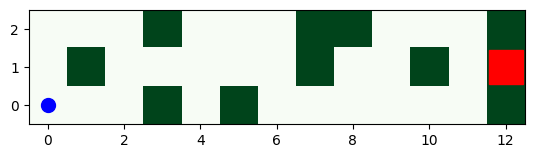

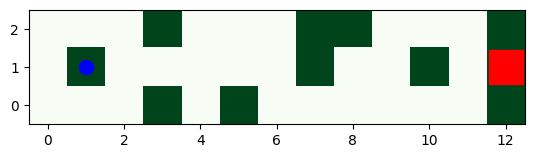

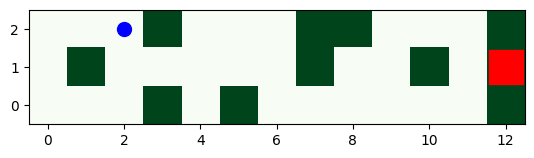

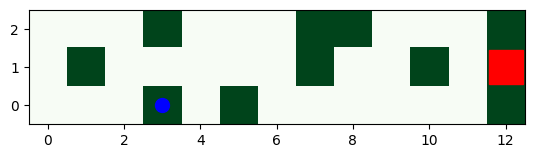

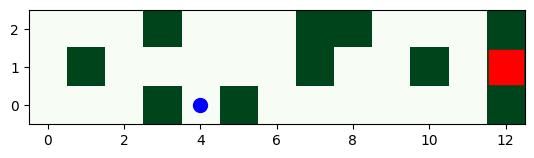

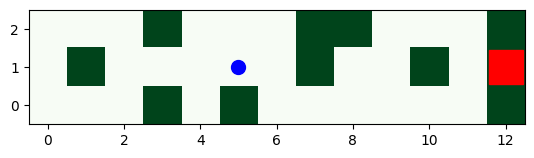

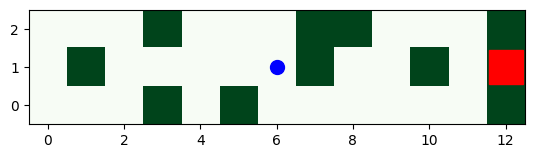

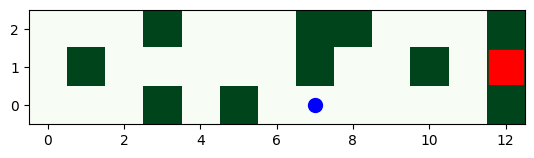

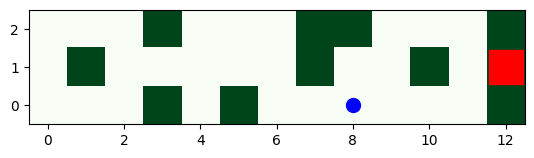

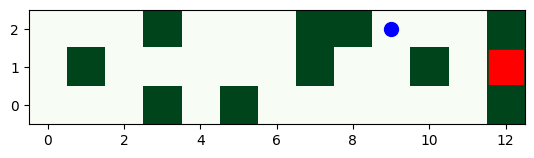

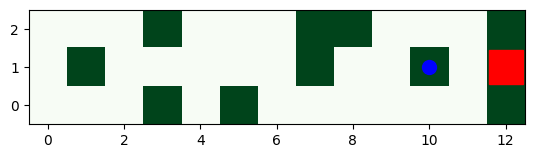

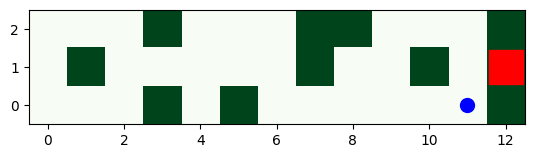

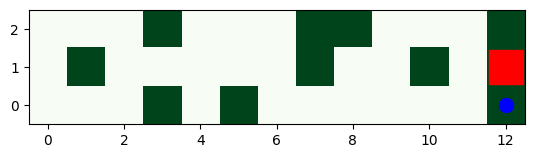

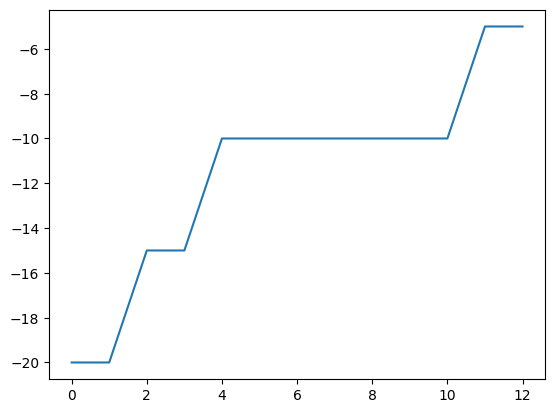

In [ ]:
#@title a policy1 and its value

policy1 = [np.array(random.sample([0,1,2],1)) for i in range(rr.nstates-1)]
print('Policy1 = ',policy1)

total_reward = 0
value_for_policy1 = [0]

rr.reset()
for action in policy1:
  rr.render()
  ns,rwd,done,info = rr.step(action)
  total_reward += rwd
  value_for_policy1.append(0)
  value_for_policy1 = [r + rwd for r in value_for_policy1]
rr.render()

plt.plot(value_for_policy1)
plt.show()

Policy =  [[2], [0], [2], [0], [2], [1], [0], [1], [2], [2], [2], [0]]
Policy =  [[0], [0], [1], [1], [0], [0], [0], [0], [2], [2], [1], [2]]
Policy =  [[0], [1], [0], [1], [2], [1], [0], [2], [0], [0], [1], [0]]
Policy =  [[2], [2], [2], [1], [1], [2], [0], [1], [1], [2], [2], [2]]
Policy =  [[0], [1], [1], [0], [1], [1], [1], [0], [1], [2], [0], [1]]


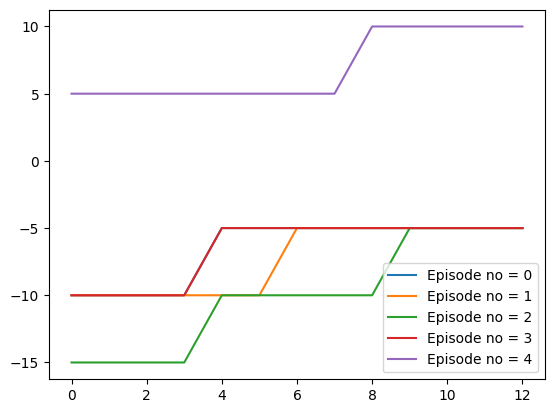

In [ ]:
#@title reward for a bunch of policies

no_ep = 5

all_ep_values = []
for ep in range(no_ep):
  policy = [np.array(random.sample([0,1,2],1)) for i in range(rr.nstates-1)]
  print('Policy = ',[val.tolist() for val in policy])

  total_reward = 0
  value_for_policy = [0]

  rr.reset()
  for action in policy:
    # rr.render()
    ns,rwd,done,info = rr.step(action)
    total_reward += rwd
    value_for_policy.append(0)
    value_for_policy = [r + rwd for r in value_for_policy]

  all_ep_values.append(value_for_policy)

  plt.plot(value_for_policy,label='Episode no = {}'.format(ep))

plt.legend()
plt.show()

OptPolicy =  [[2], [0], [1], [1], [1], [1], [0], [0], [2], [2], [1], [1]]


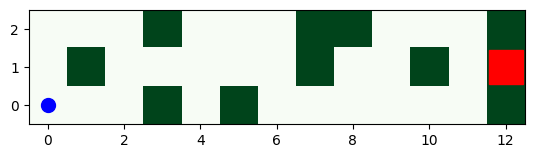

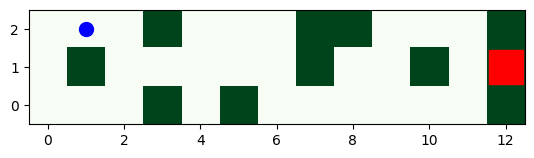

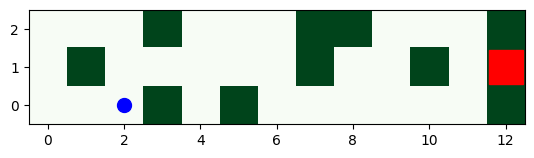

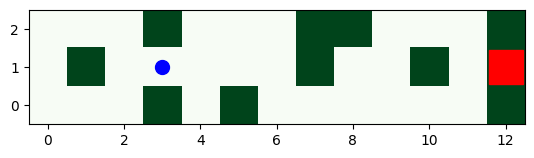

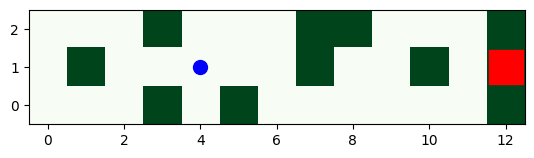

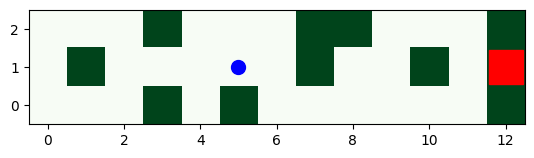

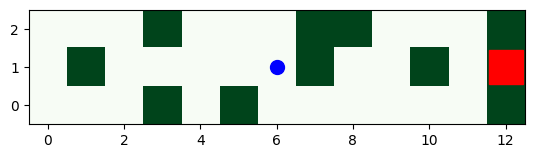

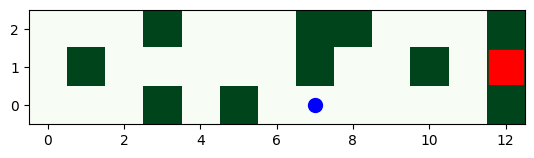

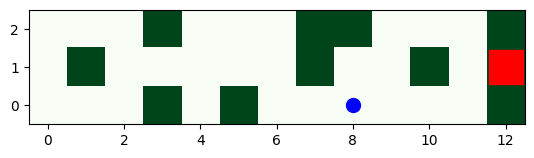

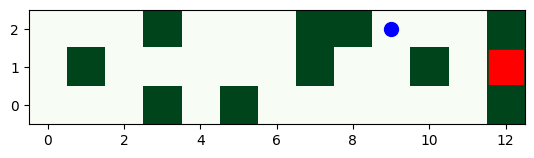

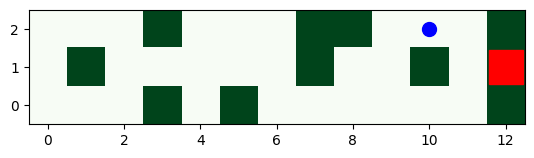

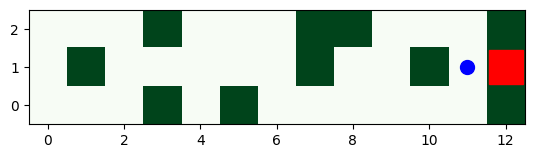

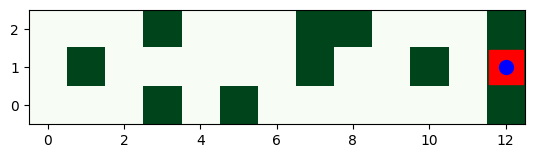

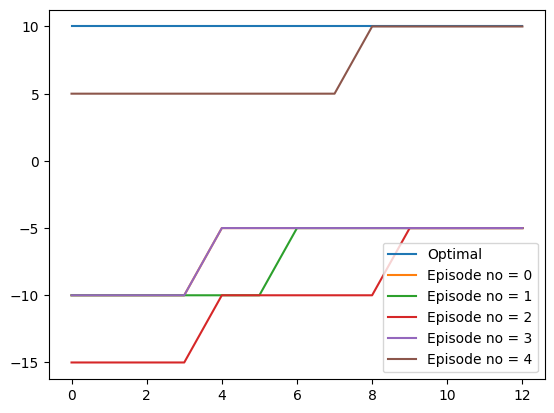

In [ ]:
#@title Optimal policy

OptPolicy = [np.array([val]) for val in [2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1]]
print('OptPolicy = ',[val.tolist() for val in OptPolicy])

total_reward = 0
value_for_OptPolicy = [0]

rr.reset()
for action in OptPolicy:
  rr.render()
  ns,rwd,done,info = rr.step(action)
  total_reward += rwd
  value_for_OptPolicy.append(0)
  value_for_OptPolicy = [r + rwd for r in value_for_OptPolicy]
rr.render()

plt.plot(value_for_OptPolicy,label='Optimal')
for ep,val in enumerate(all_ep_values):
  plt.plot(val,label='Episode no = {}'.format(ep))
plt.legend()
plt.show()

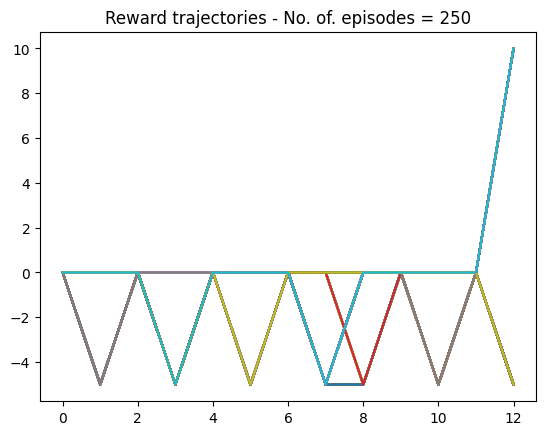

In [ ]:
#@title generate episodes for RL

total_no_ep = 250

all_episodes = []
for ep in range(total_no_ep):
  policy = [np.array(random.sample([0,1,2],1)) for i in range(rr.nstates-1)]
  # print('Policy = ',policy)

  reward_for_policy = [0]
  episode_traj = []

  s = rr.reset()
  for action in policy:
    # rr.render()
    ns,rwd,done,info = rr.step(action)

    reward_for_policy.append(rwd)
    episode_traj.append( (s,action,rwd,ns) )

    s = ns

  all_episodes.append(episode_traj)

  plt.plot(reward_for_policy,label='Episode no = {}'.format(ep))

plt.title('Reward trajectories - No. of. episodes = {}'.format(total_no_ep))
plt.show()

## Basic RL algos

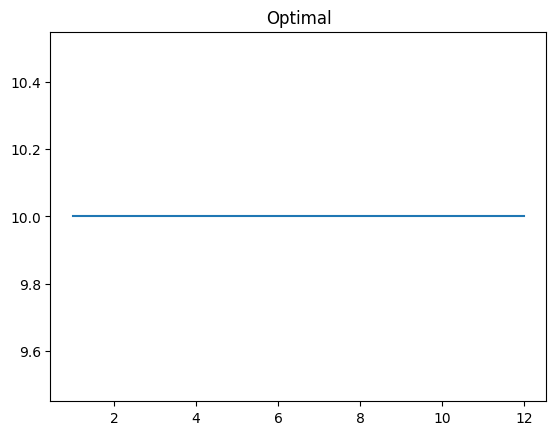

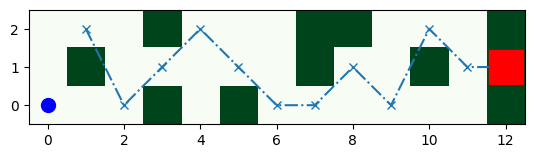

In [ ]:
#@title monte-carlo (correct?)

value_best = [-np.inf for i in range(rr.nstates)]
policy_best = [np.array([np.nan])] + [0 for i in range(rr.nstates-1)]

for ep_no,episode in enumerate(all_episodes):

  G = 0

  for i,move in enumerate(episode[::-1]):
    s,a,r,ns = move[0],move[1],move[2],move[3]
    G += r
    indx = rr.nstates-i-1
    if G>value_best[indx]:
      value_best[indx] = G
      policy_best[indx] = a

plt.plot(value_best)
plt.title('Optimal')
plt.show()

plt.plot(policy_best,'x-.')
rr.reset()
rr.render()

<ipython-input-8-5393a72e5650>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if value_best[int(s)]<r+value_best[int(ns)]: # max(value_best[i],r+value_best[i+1])
<ipython-input-8-5393a72e5650>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  value_best[int(s)] = r + value_best[int(ns)]
<ipython-input-8-5393a72e5650>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  policy_best[int(s)] = a


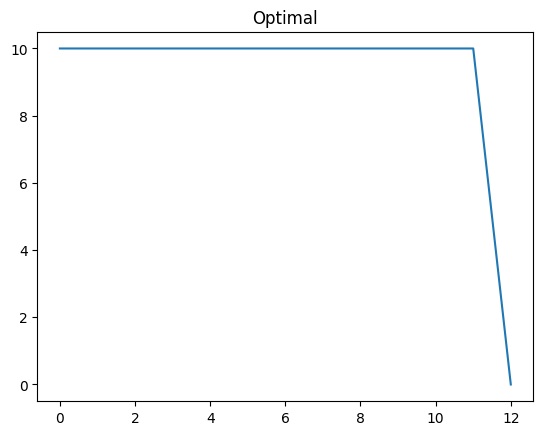

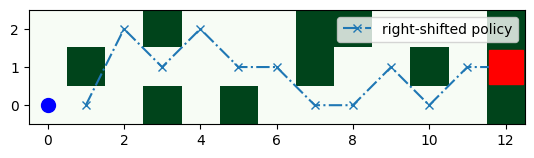

In [ ]:
#@title value iteration

value_best = [0 for i in range(rr.nstates)]
policy_best = [np.array([0]) for i in range(rr.nstates-1)]

for ep_no,episode in enumerate(all_episodes):

  for i,move in enumerate(episode):
    s,a,r,ns = move[0],move[1],move[2],move[3]
    if value_best[int(s)]<r+value_best[int(ns)]: # max(value_best[i],r+value_best[i+1])
      value_best[int(s)] = r + value_best[int(ns)]
      policy_best[int(s)] = a


plt.plot(value_best)
plt.title('Optimal')
plt.show()

plt.plot([np.array([np.nan])] + policy_best,'x-.',label='right-shifted policy')
plt.legend()
rr.reset()
rr.render()

[[10 10  5 10  5 10 10 10 10 10 10 -5  0]
 [ 5 10 10 10 10 10  5 10 10  5 10 10  0]
 [10 10  5 10 10 10  5  5 10 10 10 -5  0]]


<ipython-input-9-1a6572b7ac3c>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  value_best_ns = max(q_value_best[int(ns),:])
<ipython-input-9-1a6572b7ac3c>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q_value_best[int(s),int(a)] = r + value_best_ns # q_value_best[s] = r + max(q_value_best[:,ns])


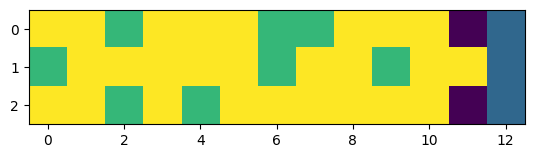

[array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1])]


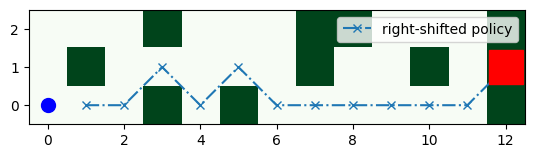

In [ ]:
#@title q-learning

q_value_best = np.array([[0 for j in range(rr.nactions)] for i in range(rr.nstates)])
policy_best = [np.array([np.nan])] + [np.array([0]) for i in range(rr.nstates-1)]

for ep_no,episode in enumerate(all_episodes):

  for i,move in enumerate(episode):
    s,a,r,ns = move[0],move[1],move[2],move[3]
    value_best_ns = max(q_value_best[int(ns),:])
    q_value_best[int(s),int(a)] = r + value_best_ns # q_value_best[s] = r + max(q_value_best[:,ns])

print(q_value_best.T)
plt.imshow(q_value_best[:,::-1].T)
plt.show()

policy_best = [np.array([ np.argmax(q_value_best[int(s),:]) ]) for s in range(rr.nstates-1)]
print(policy_best)
plt.plot([np.array([np.nan])] + policy_best,'x-.',label='right-shifted policy')
plt.legend()
rr.reset()
rr.render()

# Ends